# Identification diagnostics.

We compute Hessian, Jacobian, and interpret ranks.


Ranks: {'rank_hessian': 64, 'rank_hessian_h': 22, 'rank_Dc_hp': 64, 'rank_J': 96}
Condition numbers: {'cond_H': '1.02e+16', 'cond_H_h': '1.11e+06', 'cond_Dc': '1.09e+16', 'cond_J': '1.06e+06'}


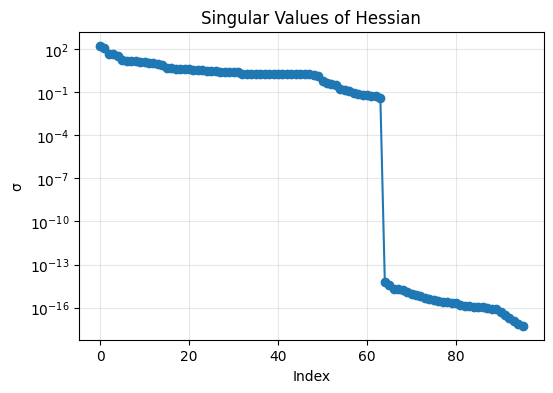

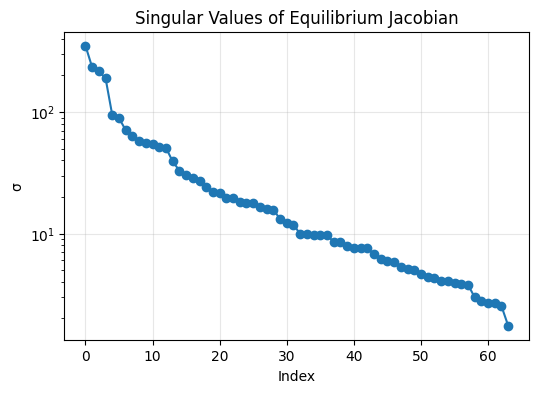

In [1]:
# %%
# 02_identification_test.py
#
# Compute Hessian, Jacobian, and rank/condition diagnostics for the
# same game and interpret the results.

# %% [markdown]
"""
# 02  Identification Diagnostics

Here we:

* Re‑use the entry‑game parameters  
* Build the log‑likelihood Hessian and the equilibrium‑constraint Jacobian  
* Check matrix ranks and condition numbers  
* Visualise singular values of H and Dc
"""
# %%
import sys, pathlib, os
# Path to the *src* directory that contains the package
root = pathlib.Path().resolve()          
src_path = root.parent / "src"        
sys.path.append(str(src_path))
import numpy as np
import matplotlib.pyplot as plt
from discrete_game_identification import (
    solve_equilibrium,
    compute_joint_distribution,
    compute_scores_general,
    build_hessian_general,
    build_Dc_hp_general,
    ranks_and_condition_numbers,
)

plt.rcParams["figure.figsize"] = (6, 4)

# %% 1  Re‑create the game (same as notebook 01 but shorter)
nplayers, num_z, num_kappa = 2, 4, 2
zvals = np.arange(num_z)/(num_z-1)
alpha = np.zeros((nplayers, num_z, num_kappa))
beta  = np.zeros((nplayers, nplayers, num_z, num_kappa))
alpha[0] = -2 + 5*zvals[:,None] + 1*np.arange(num_kappa)
beta[0,1] = -2
alpha[1] = -3 + 4*zvals[:,None] + 0.5*np.arange(num_kappa)
beta[1,0] = -3

p_equil = solve_equilibrium(alpha, beta)
num_states = num_z**nplayers
h = np.full((num_states, num_kappa), (0.7, 0.3))

# %% 2  Build likelihood pieces
Q, actions = compute_joint_distribution(p_equil, h)
scores     = compute_scores_general(p_equil, h, actions)
H          = build_hessian_general(scores, Q)
Dc         = build_Dc_hp_general(p_equil, beta)

ranks, conds = ranks_and_condition_numbers(H, Dc)
print("Ranks:", ranks)
print("Condition numbers:", {k:f"{v:.2e}" for k,v in conds.items()})

# %% 3  Plot singular values of Hessian and Jacobian
for M, title in [(H, "Hessian"), (Dc, "Equilibrium Jacobian")]:
    svals = np.linalg.svd(M, compute_uv=False)
    plt.semilogy(svals, marker="o")
    plt.title(f"Singular Values of {title}")
    plt.ylabel("σ")
    plt.xlabel("Index")
    plt.grid(alpha=.3)
    plt.show()
